In [1]:
import random
import matplotlib.pyplot as plt
from trees.bst import BST
from trees.random_bst import RandomBST
from trees.splay import SplayTree
from trees.avl_tree import AVLTree

In [7]:
bst = BST()

random_sequence = random.sample(range(1, 11), 10)

for num in random_sequence:
    bst.insert(num)

print("Random sequence:", random_sequence)

print("Binary Search Tree:", bst)

while True:
    k = int(input("Enter a key to delete (or 100 to exit): "))
    if k == 100:
        break
    bst.delete_by_key(k)
    print()
    print("Modified BST after deleting element with key", str(k) + str(':'))
    print(bst)

while True:
    m = int(input("Enter an index to delete (or 100 to exit): "))
    if m == 100:
        break
    bst.delete_by_index(m)
    print()
    print("Modified BST after deleting element with index", str(m) + str(':'))
    print(bst)

Random sequence: [10, 2, 4, 9, 1, 8, 7, 6, 3, 5]
Binary Search Tree: { (1; 1) <- (2; 9) -> (3; 1) <- (4; 7) -> (5; 1) <- (6; 2) <- (7; 3) <- (8; 4) <- (9; 5) <- (10; 10) }

Modified BST after deleting element with key 6:
{ (1; 1) <- (2; 8) -> (3; 1) <- (4; 6) -> (5; 1) <- (7; 2) <- (8; 3) <- (9; 4) <- (10; 9) }

Modified BST after deleting element with key 4:
{ (1; 1) <- (2; 7) -> (3; 5) -> (5; 1) <- (7; 2) <- (8; 3) <- (9; 4) <- (10; 8) }

Modified BST after deleting element with index 1:
{ (2; 6) -> (3; 5) -> (5; 1) <- (7; 2) <- (8; 3) <- (9; 4) <- (10; 7) }

Modified BST after deleting element with index 4:
{ (2; 5) -> (3; 4) -> (5; 1) <- (8; 2) <- (9; 3) <- (10; 6) }


In [6]:
bst_leaf_insertion = BST()
bst_root_insertion = BST()

ascending_sequence = [i + 1 for i in range(10)]


print("Ascending sequence:", ascending_sequence)

for key in ascending_sequence:
    bst_leaf_insertion.insert(key)
    bst_root_insertion.insert_as_root(key)

print("BST Leaf Insertion:", bst_leaf_insertion)
print("BST Root Insertion:", bst_root_insertion)

Ascending sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
BST Leaf Insertion: { (1; 10) -> (2; 9) -> (3; 8) -> (4; 7) -> (5; 6) -> (6; 5) -> (7; 4) -> (8; 3) -> (9; 2) -> (10; 1) }
BST Root Insertion: { (1; 1) <- (2; 2) <- (3; 3) <- (4; 4) <- (5; 5) <- (6; 6) <- (7; 7) <- (8; 8) <- (9; 9) <- (10; 10) }


In [2]:
def compare_disbalance_rates_of_trees(tree1, tree2, sequence):
    tree1_disbalance_rates = []
    tree2_disbalance_rates = []
    
    for key in sequence:
        tree1.insert(key)
        tree1_disbalance_rates.append(tree1.get_disbalance_rate())
        tree2.insert(key)
        tree2_disbalance_rates.append(tree2.get_disbalance_rate())
    
    return tree1_disbalance_rates, tree2_disbalance_rates

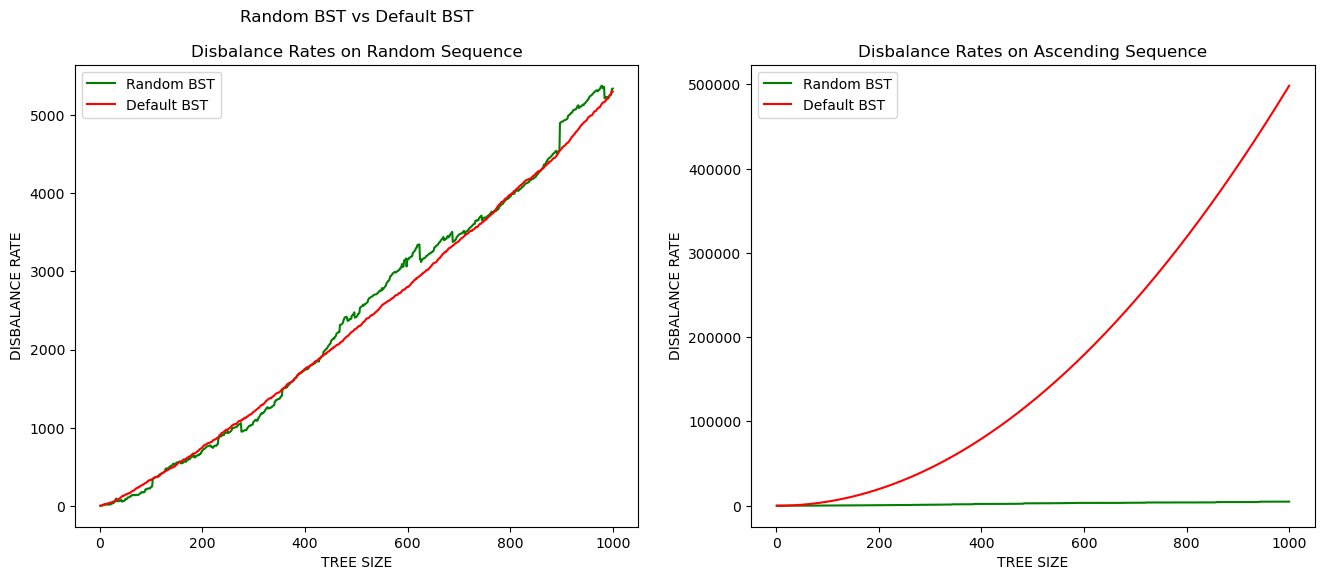

In [3]:
plt.rcParams["figure.figsize"] = (16, 6)
figure, axis = plt.subplots(1, 2)
TEST_RANGE = range(1, 1001)

random_sequence = random.sample(TEST_RANGE, len(TEST_RANGE))
random_bst = RandomBST()
bst = BST()
random_bst_disbalance_rates, bst_disbalance_rates = compare_disbalance_rates_of_trees(random_bst, bst, random_sequence)

axis[0].plot(list(TEST_RANGE), random_bst_disbalance_rates, color='green', label='Random BST')
axis[0].plot(list(TEST_RANGE), bst_disbalance_rates, color='red', label='Default BST')
axis[0].set_title('Random BST vs Default BST\n\nDisbalance Rates on Random Sequence')
axis[0].set_xlabel('TREE SIZE')
axis[0].set_ylabel('DISBALANCE RATE')
axis[0].legend()

ascending_sequence = list(TEST_RANGE)
random_bst = RandomBST()
bst = BST()
random_bst_disbalance_rates, bst_disbalance_rates = compare_disbalance_rates_of_trees(random_bst, bst, ascending_sequence)

axis[1].plot(list(TEST_RANGE), random_bst_disbalance_rates, color='green', label='Random BST')
axis[1].plot(list(TEST_RANGE), bst_disbalance_rates, color='red', label='Default BST')
axis[1].set_title('Disbalance Rates on Ascending Sequence')
axis[1].set_xlabel('TREE SIZE')
axis[1].set_ylabel('DISBALANCE RATE')
axis[1].legend()

In [7]:
def compare_search_depth_of_trees(splay, bst, tree_sequence, search_sequence):
    depth_measures_splay = []
    depth_measures_bst = []

    for key in tree_sequence:
        splay.insert(key)
        bst.insert(key)

    for key in search_sequence:
        res_splay, depth_splay = splay.find(key)
        res_bst, depth_bst = bst.find(key)
        
        if res_splay.key != key:
            print('Splay Tree failed')
        if res_bst.key != key:
            print('Default Binary Tree failed')
        
        depth_measures_splay.append(depth_splay)
        depth_measures_bst.append(depth_bst)
    
    return depth_measures_splay, depth_measures_bst


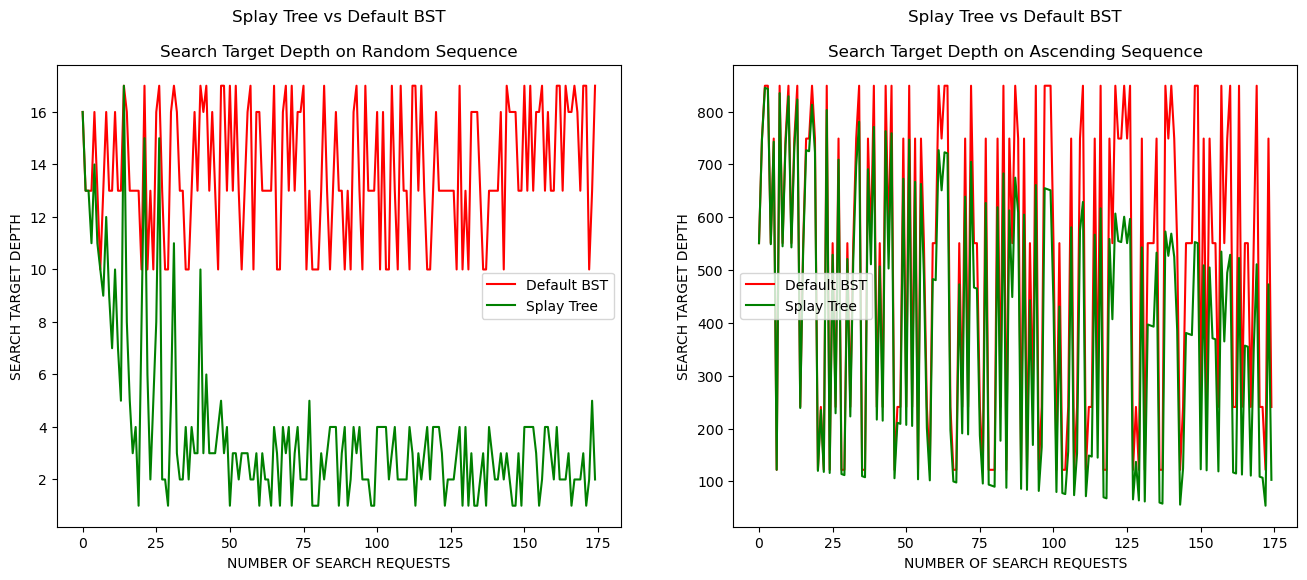

In [8]:
plt.rcParams["figure.figsize"] = (16, 6)
figure, axis = plt.subplots(1, 2)
TEST_RANGE = range(1, 2500)

search_sequence = random.sample(TEST_RANGE, 5)
search_sequence *= 35
random.shuffle(search_sequence)

random_sequence = random.sample(TEST_RANGE, len(TEST_RANGE))
splay = SplayTree()
bst = BST()
depth_measures_splay, depth_measures_bst = compare_search_depth_of_trees(splay, bst, random_sequence, search_sequence)

axis[0].plot(list(range(len(search_sequence))), depth_measures_bst, color='red', label='Default BST')
axis[0].plot(list(range(len(search_sequence))), depth_measures_splay, color='green', label='Splay Tree')
axis[0].set_title('Splay Tree vs Default BST\n\nSearch Target Depth on Random Sequence')
axis[0].set_xlabel('NUMBER OF SEARCH REQUESTS')
axis[0].set_ylabel('SEARCH TARGET DEPTH')
axis[0].legend()

ascending_sequence = list(TEST_RANGE)
splay = SplayTree()
bst = BST()
depth_measures_splay, depth_measures_bst = compare_search_depth_of_trees(splay, bst, ascending_sequence, search_sequence)

axis[1].plot(list(range(len(search_sequence))), depth_measures_bst, color='red', label='Default BST')
axis[1].plot(list(range(len(search_sequence))), depth_measures_splay, color='green', label='Splay Tree')
axis[1].set_title('Splay Tree vs Default BST\n\nSearch Target Depth on Ascending Sequence')
axis[1].set_xlabel('NUMBER OF SEARCH REQUESTS')
axis[1].set_ylabel('SEARCH TARGET DEPTH')
axis[1].legend()

In [5]:
TEST_RANGE = range(1, 2500)
random_sequence = random.sample(TEST_RANGE, len(TEST_RANGE))
ascending_sequence = list(TEST_RANGE)

avl_tree = AVLTree()
for key in random_sequence:
    avl_tree.insert(key)
leaves_height_list = avl_tree.get_leaves_height()
print('AVL Tree on Random Sequence:', avl_tree)
print("List of Leaves Heights on Random Sequence", leaves_height_list)
sorted(leaves_height_list)
if leaves_height_list[-1] - leaves_height_list[0] > 1:
    print('Error on random sequence: abs difference between AVL Tree leaves depth is greater then 1')
else:
    print('Random sequence test passed: abs difference between any two AVL Tree leaves depth is not greater then 1')

print()

avl_tree = AVLTree()
for key in ascending_sequence:
    avl_tree.insert(key)
leaves_height_list = avl_tree.get_leaves_height()
print('AVL Tree on Ascending Sequence:', avl_tree)
print("List of Leaves Heights on Ascending Sequence:", leaves_height_list)
sorted(leaves_height_list)
if leaves_height_list[-1] - leaves_height_list[0] > 1:
    print('Error on ascending sequence: abs difference between AVL Tree leaves depth is greater then 1')
else:
    print('Ascending sequence test passed: abs difference between any two AVL Tree leaves depth is not greater then 1')

AVL Tree on Random Sequence: { 1 <- 2 -> 3 -> 4 <- 5 -> 6 -> 7 <- 8 -> 9 <- 10 -> 11 <- 12 -> 13 <- 14 -> 15 <- 16 -> 17 <- 18 -> 19 <- 20 <- 21 -> 22 -> 23 <- 24 -> 25 <- 26 <- 27 -> 28 <- 29 -> 30 -> 31 <- 32 -> 33 -> 34 <- 35 -> 36 <- 37 -> 38 <- 39 -> 40 <- 41 -> 42 <- 43 -> 44 -> 45 <- 46 -> 47 <- 48 -> 49 <- 50 -> 51 <- 52 -> 53 <- 54 -> 55 <- 56 -> 57 <- 58 -> 59 <- 60 -> 61 <- 62 -> 63 -> 64 <- 65 -> 66 -> 67 <- 68 -> 69 <- 70 -> 71 <- 72 -> 73 <- 74 -> 75 <- 76 -> 77 <- 78 -> 79 <- 80 -> 81 <- 82 -> 83 <- 84 -> 85 <- 86 -> 87 <- 88 -> 89 <- 90 <- 91 -> 92 <- 93 <- 94 -> 95 <- 96 <- 97 -> 98 <- 99 -> 100 <- 101 -> 102 <- 103 -> 104 <- 105 -> 106 <- 107 -> 108 <- 109 -> 110 <- 111 -> 112 <- 113 <- 114 -> 115 <- 116 -> 117 <- 118 -> 119 <- 120 -> 121 <- 122 -> 123 -> 124 <- 125 -> 126 <- 127 -> 128 -> 129 <- 130 -> 131 <- 132 -> 133 <- 134 -> 135 <- 136 -> 137 <- 138 -> 139 <- 140 -> 141 <- 142 -> 143 -> 144 <- 145 -> 146 -> 147 <- 148 -> 149 -> 150 <- 151 -> 152 <- 153 -> 154 <-